# Building a VocabList
In this notebook we are going to build a VocabList that is sensitive to word frequencies. The following steps are involved:
1. Run a TF query.
2. Export the TF query.
3. Import the TF query into a `pandas` dataframe.
4. Substract the data we want for our VocabList.
5. Export our selected data as a spreadsheet.
6. Create a PDF from your spreadsheet so that it can be printed of and distributed among students.

# Getting the Data-Analysis workbench ready

## Loading Data-Analysis tools

## Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [5]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [6]:
# Now we load the TF bhsa database
OT = use('bhsa', hoist=globals())

In [7]:
# Now we load the TF tisch database
NT = use('tisch', hoist=globals())

## Loading data analysis tools

In [8]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Creating a Greek Vocablist for students
We will run the same query on John 3 that we ran in our last Notebook and will use it to produce a VocabList for students.

## Searching for all words that appear leass than 10 times in John 3

In [9]:
VocabListJohn3 = '''
book book=John
    chapter chapter=3
        word freq_lex_og<10 gloss* anlex_lem* lex_og* lex_abc*

'''
VocabListJohn3  = NT.search(VocabListJohn3)
NT.table(VocabListJohn3, start=1, end=15, extraFeatures={'anlex_lem','freq_lex', 'freq_lex_og', 'lex_abc', 'gloss'}, condensed=False)

  0.30s 15 results


n,p,book,chapter,word
1,John 3:1,John,John 3,Νικόδημος
2,John 3:4,John,John 3,Νικόδημος·
3,John 3:4,John,John 3,γέρων
4,John 3:8,John,John 3,"πνεῖ,"
5,John 3:9,John,John 3,Νικόδημος
6,John 3:12,John,John 3,ἐπίγεια
7,John 3:16,John,John 3,μονογενῆ
8,John 3:18,John,John 3,μονογενοῦς
9,John 3:20,John,John 3,φαῦλα
10,John 3:23,John,John 3,Αἰνὼν


There is a total of 15 words in John 3 that appear less frequent than 10x. In order to produce a Vocab List we have to export our search results. How to do this, we will learn in one of our next notebooks... ;-)

## Creating a Vocab List

In [10]:
NT.export(VocabListJohn3, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='VocabListJohn3.tsv')

In [11]:
VocabListJohn3=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/VocabListJohn3.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListJohn3

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,chapter2,NODE3,TYPE3,TEXT3,anlex_lem3,freq_lex_og3,gloss3,lex_abc3,lex_og3
0,1,John,3,1,137715,book,John,137809,chapter,3,50194,word,Νικόδημος,Νικόδημος,5,Nicodemus,3363,Nikodemos
1,2,John,3,4,137715,book,John,137809,chapter,3,50257,word,Νικόδημος·,Νικόδημος,5,Nicodemus,3363,Nikodemos
2,3,John,3,4,137715,book,John,137809,chapter,3,50262,word,γέρων,γέρων,1,old person,1076,geron
3,4,John,3,8,137715,book,John,137809,chapter,3,50326,word,"πνεῖ,",πνέω,7,to blow,3976,pneo
4,5,John,3,9,137715,book,John,137809,chapter,3,50349,word,Νικόδημος,Νικόδημος,5,Nicodemus,3363,Nikodemos
5,6,John,3,12,137715,book,John,137809,chapter,3,50392,word,ἐπίγεια,ἐπίγειος,7,being on the earth,1899,epigeios
6,7,John,3,16,137715,book,John,137809,chapter,3,50463,word,μονογενῆ,μονογενής,9,one and only,3277,monogenes
7,8,John,3,18,137715,book,John,137809,chapter,3,50516,word,μονογενοῦς,μονογενής,9,one and only,3277,monogenes
8,9,John,3,20,137715,book,John,137809,chapter,3,50551,word,φαῦλα,φαῦλος,6,evil,5116,phaulos
9,10,John,3,23,137715,book,John,137809,chapter,3,50613,word,Αἰνὼν,Αἰνών,1,Aenon,137,Ainon


In [12]:
VocabListJohn3 = VocabListJohn3[['anlex_lem3', 'lex_og3', 'gloss3', 'freq_lex_og3', 'lex_abc3']]
VocabListJohn3

,anlex_lem3,lex_og3,gloss3,freq_lex_og3,lex_abc3
0,Νικόδημος,Nikodemos,Nicodemus,5,3363
1,Νικόδημος,Nikodemos,Nicodemus,5,3363
2,γέρων,geron,old person,1,1076
3,πνέω,pneo,to blow,7,3976
4,Νικόδημος,Nikodemos,Nicodemus,5,3363
5,ἐπίγειος,epigeios,being on the earth,7,1899
6,μονογενής,monogenes,one and only,9,3277
7,μονογενής,monogenes,one and only,9,3277
8,φαῦλος,phaulos,evil,6,5116
9,Αἰνών,Ainon,Aenon,1,137


In [13]:
VocabListJohn3Final = VocabListJohn3.drop_duplicates().sort_values(by='lex_abc3', ascending=[True])
VocabListJohn3Final

,anlex_lem3,lex_og3,gloss3,freq_lex_og3,lex_abc3
9,Αἰνών,Ainon,Aenon,1,137
2,γέρων,geron,old person,1,1076
14,ἐλαττόω,elattoo,to make lower than,3,1623
5,ἐπίγειος,epigeios,being on the earth,7,1899
11,ζήτησις,zetesis,argument,7,2188
12,καθαρισμός,katharismos,cleansing,7,2470
6,μονογενής,monogenes,one and only,9,3277
0,Νικόδημος,Nikodemos,Nicodemus,5,3363
13,νύμφη,numphe,bride,8,3396
3,πνέω,pneo,to blow,7,3976


## Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [14]:
VocabListJohn3Final.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/TF-tutorial/VocabListJohn3Final.xlsx')

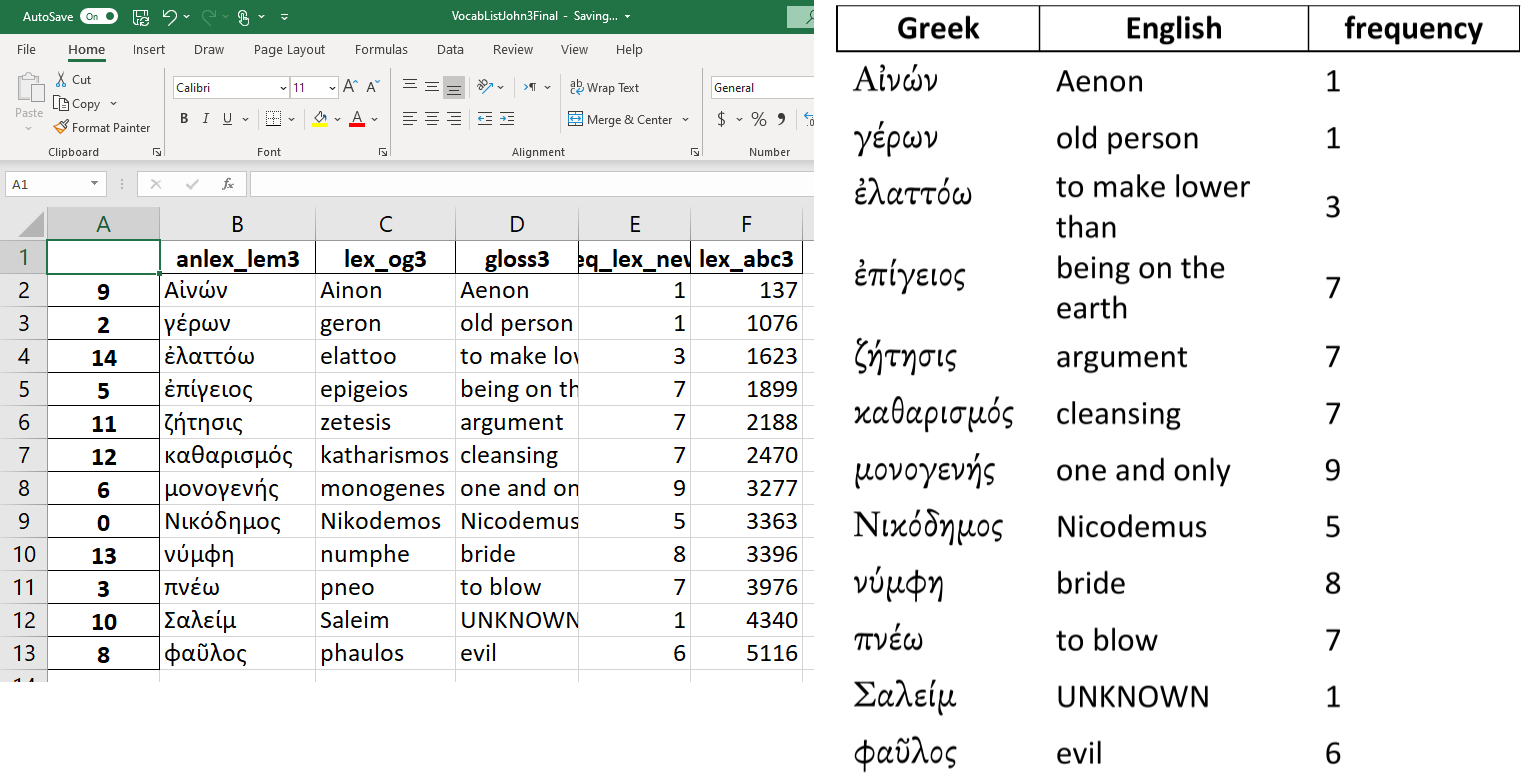

# Creating a Hebrew Vocablist for students

## Searching for all words that appear leass than 100 times in Esther 6

In [15]:
VocabListEsther6 = '''
book book=Esther
    chapter chapter=6
        word freq_lex<100 gloss* dict_bol_HebArm* dict_bol_EN* dict_bol_abc*
'''
VocabListEsther6  = OT.search(VocabListEsther6)
OT.table(VocabListEsther6, start=1, end=15, extraFeatures={'freq_lex', 'dict_bol_HebArm', 'dict_bol_EN', 'dict_bol_abc','gloss'}, condensed=False)

  1.76s 74 results


n,p,book,chapter,word
1,Esther 6:1,Esther,Esther 6,נָדְדָ֖ה
2,Esther 6:1,Esther,Esther 6,שְׁנַ֣ת
3,Esther 6:1,Esther,Esther 6,זִּכְרֹנֹות֙
4,Esther 6:2,Esther,Esther 6,מָרְדֳּכַ֜י
5,Esther 6:2,Esther,Esther 6,בִּגְתָ֣נָא
6,Esther 6:2,Esther,Esther 6,תֶ֗רֶשׁ
7,Esther 6:2,Esther,Esther 6,סָרִיסֵ֣י
8,Esther 6:2,Esther,Esther 6,סַּ֑ף
9,Esther 6:2,Esther,Esther 6,אֲחַשְׁוֵרֹֽושׁ׃
10,Esther 6:3,Esther,Esther 6,יְקָ֧ר


## Creating a Vocab List

In [16]:
OT.export(VocabListEsther6, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='VocabListEsther6.tsv')

In [17]:
VocabListEsther6=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/VocabListEsther6.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListEsther6

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,chapter2,NODE3,TYPE3,TEXT3,dict_bol_EN3,dict_bol_HebArm3,dict_bol_abc3,freq_lex3,gloss3
0,1,Esther,6,1,426618,book,Esther,427448,chapter,6,367938,word,נָדְדָ֖ה,"qal: run away, flee; wander; flutter (wings); ...",נדד,4947,27,flee
1,2,Esther,6,1,426618,book,Esther,427448,chapter,6,367939,word,שְׁנַ֣ת,sleep,שֵׁנָה II,8003,23,sleep
2,3,Esther,6,1,426618,book,Esther,427448,chapter,6,367949,word,זִּכְרֹנֹות֙,reminder,זִכָּרֹון,2044,24,remembrance
3,4,Esther,6,2,426618,book,Esther,427448,chapter,6,367965,word,מָרְדֳּכַ֜י,Mordecai,מָרְדְּכַי,4655,60,Mordecai
4,5,Esther,6,2,426618,book,Esther,427448,chapter,6,367967,word,בִּגְתָ֣נָא,Bigthana,בִּגְתָן,860,2,Bigthana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,Esther,6,14,426618,book,Esther,427448,chapter,6,368315,word,סָרִיסֵ֥י,"court-official, eunuch",סָרִיס,5493,45,official
70,71,Esther,6,14,426618,book,Esther,427448,chapter,6,368320,word,יַּבְהִ֨לוּ֙,ni: be terrified; pi: terrify; hasten; be in h...,בהל,881,39,disturb
71,72,Esther,6,14,426618,book,Esther,427448,chapter,6,368324,word,הָמָ֔ן,Haman,הָמָן II,1901,54,Haman
72,73,Esther,6,14,426618,book,Esther,427448,chapter,6,368327,word,מִּשְׁתֶּ֖ה,(drinking-) feast,מִשְׁתֶּה,4843,46,drinking


In [18]:
VocabListEsther6 = VocabListEsther6[['dict_bol_HebArm3', 'dict_bol_EN3', 'freq_lex3', 'dict_bol_abc3']]
VocabListEsther6.head(15)

,dict_bol_HebArm3,dict_bol_EN3,freq_lex3,dict_bol_abc3
0,נדד,"qal: run away, flee; wander; flutter (wings); ...",27,4947
1,שֵׁנָה II,sleep,23,8003
2,זִכָּרֹון,reminder,24,2044
3,מָרְדְּכַי,Mordecai,60,4655
4,בִּגְתָן,Bigthana,2,860
5,תֶּרֶשׁ,Teresh,2,8511
6,סָרִיס,"court-official, eunuch",45,5493
7,סַף II,threshold,25,5452
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
9,יְקָר II,"preciousness; honoring, esteeming",17,3249


In [19]:
VocabListEsther6Final = VocabListEsther6.drop_duplicates().sort_values('dict_bol_abc3', ascending=[True])
VocabListEsther6Final

,dict_bol_HebArm3,dict_bol_EN3,freq_lex3,dict_bol_abc3
61,אָבֵל IV,in mourning,8,55
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
73,אֶסְתֵּר,Esther,55,610
4,בִּגְתָן,Bigthana,2,860
70,בהל,ni: be terrified; pi: terrify; hasten; be in h...,39,881
10,גְּדוּלָּה,greatness,12,1345
60,דחף,"qal: hasten; ni: hasten onseself, hurry;",4,1683
13,הָמָן II,Haman,54,1901
2,זִכָּרֹון,reminder,24,2044
64,זֶרֶשׁ,Zeresh,4,2135


## Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [20]:
VocabListEsther6Final.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/TF-tutorial/VocabListEsther6Final.xlsx')

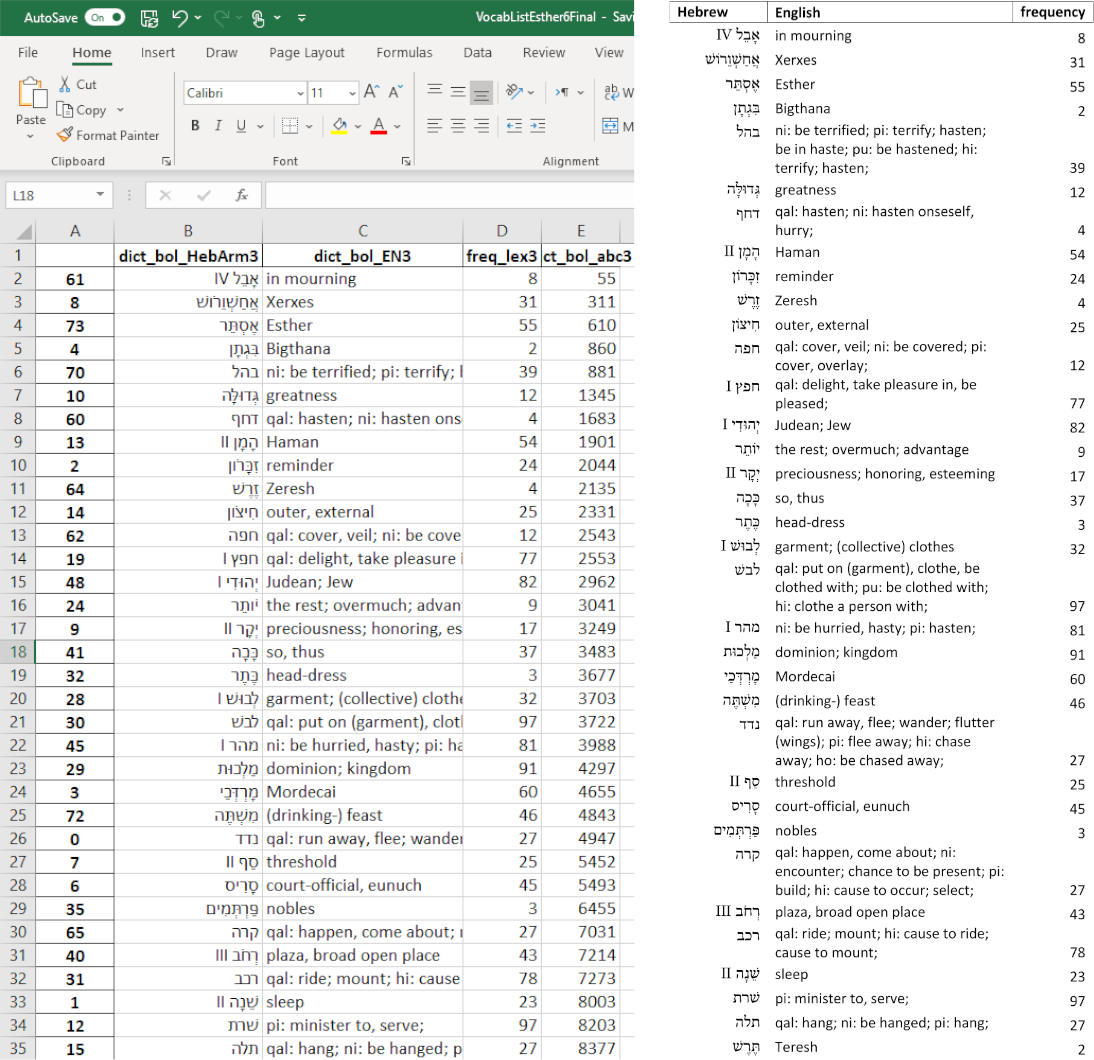

# Assignments
Create your own Vocab List on a passage you select.

# Whats Next?: Complex Query building
1. We will learn the basic architecture of the BHS and the Tischendorf database.
2. Understanding the database better will allow us to build sophisticated queries, including syntax queries...